## Testing the chunksize and temperature

In [1]:
import os
from openai import OpenAI


# Initialize the OpenAI client
client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',  # Placeholder, required by the client but not used
)
# chunking each file text
def chunktext(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 500 so that it will lookup for previous 500 words cut from the specific word
        start += chunk_size - overlap
    return chunks

def getsummary(content):
    response = client.chat.completions.create(
        model='gemma2',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # Number of tokens for the summary
        temperature=0.5,  # Temperature controls the creativity of the response
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    chunks = chunktext(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = getsummary(chunk)
        summaries.append(summary)
    
    finalsummary = "\n".join(summaries)
    return finalsummary


filepath = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/INQ000350057.txt'

summary = summarizetext(filepath)

print(summary)


This document is a technical advisory issued by a group in Wales concerning non-pharmaceutical interventions (NPIs) before Christmas. It highlights:

**Key points:**

* **Virus Transmission:** Infection spreads through contact between infected and uninfected individuals. Close contact, particularly indoors, poses higher risk. 
* **NPI Effectiveness:** Social distancing and quarantine remain effective in reducing transmission if adhered to correctly. Pre-isolating for ten days (avoiding mixing outside one's household) can significantly lower infection risk. Self-isolation is crucial for those experiencing COVID symptoms.

* **Protection of Elderly:** Avoiding contact with vulnerable older family members is essential, even if motives are well-intentioned.
* **Household Mixing Concerns:** Data shows increased household mixing, often coupled with misunderstanding the transmission risks. Limiting mixing between households significantly reduces overall risk of infection, hospitalization, and

## Llama3 Model

In [1]:
# checking if the model is responding
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',

    # required but ignored
    api_key='ollama',
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            'role': 'user',
            'content': 'Which model are you?',
        }
    ],
    model='llama3',
)

print(chat_completion.choices[0].message.content)

I am LLaMA, a large language model trained by Meta AI that can converse with humans in a natural and engaging way. I'm not a specific person or character, but rather a computer program designed to simulate conversation. My purpose is to assist users by providing helpful and accurate information, answering questions, and even generating creative content like stories and poems.


In [1]:
import os
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',  
)
# chunking each file text
def chunktext(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 150 so that it will lookup for previous 150 words cut from the specific word
        start += chunk_size - overlap
    return chunks

def getsummary(content):
    response = client.chat.completions.create(
        model='llama3',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # number of tokens for the summary
        temperature=0.5,  # temperature controls the creativity of the response
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    chunks = chunktext(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = getsummary(chunk)
        summaries.append(summary)
    
    # returning each chunks to file
    finalsummary = "\n".join(summaries)
    return finalsummary

# input directory for reading the cleaned text file 
inputfiles = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/'
# output directory to store the summary of each files
outputpath = 'LLM Summaries/Selected_LLM_Models_PYPDF2/llama3/lamma3res/'

os.makedirs(outputpath, exist_ok=True)

for filename in os.listdir(inputfiles):
    if filename.endswith('.txt'):
        filepath = os.path.join(inputfiles, filename)
        
        # read and summarize the text content
        summary = summarizetext(filepath)
        
        # write the summary to the output directory
        outputfilepath = os.path.join(outputpath, f"{os.path.splitext(filename)[0]}.txt")
        with open(outputfilepath, 'w', encoding='utf-8') as outputfile:
            outputfile.write(summary)
        
        print(f"Summary for {filename}")

print("Summaries have been saved successfully.")

# rough estimation of 77 minutes

Summary for INQ000350057.txt
Summary for INQ000350094.txt
Summary for INQ000350513.txt
Summary for INQ000350691.txt
Summary for INQ000383581.txt
Summary for INQ000383585.txt
Summary for INQ000383998.txt
Summary for INQ000385719.txt
Summary for INQ000395589.txt
Summary for INQ000395913.txt
Summary for INQ000396684.txt
Summary for INQ000396685.txt
Summary for INQ000396686.txt
Summary for INQ000400585.txt
Summary for INQ000412042.txt
Summaries have been saved successfully.


__Adding title to each files__

In [2]:
import pandas as pd
import os

# reading the csv files that has the detials about the files
df = pd.read_csv('../2.PDFExtraction/SamplePdfDetail.csv')

txtdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/llama3/lamma3res/'

outputdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/llama3/llama3final/'

os.makedirs(outputdir, exist_ok=True)

for filename in os.listdir(txtdir):
    if filename.endswith('.txt'):
        txtpath = os.path.join(txtdir, filename)
        
        # replacing the .txt extension with .pdf to match the CSV 'Filename' column
        csvfilename = filename.replace('.txt', '.pdf')
        
        # if the CSV has a matching filename
        rowsfound = df[df['Filename'] == csvfilename]
        
        if not rowsfound.empty:
            # row which is appearing as the same filename
            title = rowsfound.iloc[0]['Title']
            
            # obtaining the content of the txt file
            with open(txtpath, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # output directory to store the response
            outputpath = os.path.join(outputdir, filename)
            
            # writing the title for the each txt file
            with open(outputpath, 'w', encoding='utf-8') as file:
                file.write(f"Title: {title}\n\n{content}")
        else:
            print(f"No matching CSV entry found for {filename}")


## Llama3.1 Model

In [3]:
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',

    # required but ignored
    api_key='ollama',
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            'role': 'user',
            'content': 'Which model are you?',
        }
    ],
    model='llama3.1',
)

print(chat_completion.choices[0].message.content)

I'm an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."


__All the files to be passed for summarisation__

In [4]:
import os
from openai import OpenAI


client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',  # Placeholder, required by the client but not used
)

# chunking each file text
def chunktext(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 500 so that it will lookup for previous 500 words cut from the specific word
        start += chunk_size - overlap
    return chunks

def getsummary(content):
    response = client.chat.completions.create(
        model='llama3.1',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # number of tokens for the summary
        temperature=0.5,  # temperature controls the creativity of the response
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    chunks = chunktext(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = getsummary(chunk)
        summaries.append(summary)
    
    finalsummary = "\n".join(summaries)
    return finalsummary

# input directory for reading the cleaned text file
inputfiles = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/'
# output directory to store the summary of each files
outputpath = 'LLM Summaries/Selected_LLM_Models_PYPDF2/llama3.1/llama3.1res/'

os.makedirs(outputpath, exist_ok=True)

for filename in os.listdir(inputfiles):
    if filename.endswith('.txt'):
        filepath = os.path.join(inputfiles, filename)
        
        # read and summarize the text content
        summary = summarizetext(filepath)
        
        # write the summary to the output directory
        outputfilepath = os.path.join(outputpath, f"{os.path.splitext(filename)[0]}.txt")
        with open(outputfilepath, 'w', encoding='utf-8') as outputfile:
            outputfile.write(summary)
        
        print(f"Summary for {filename}")

print("Summaries have been saved successfully.")

# rough estimation of 82 minutes

Summary for INQ000350057.txt
Summary for INQ000350094.txt
Summary for INQ000350513.txt
Summary for INQ000350691.txt
Summary for INQ000383581.txt
Summary for INQ000383585.txt
Summary for INQ000383998.txt
Summary for INQ000385719.txt
Summary for INQ000395589.txt
Summary for INQ000395913.txt
Summary for INQ000396684.txt
Summary for INQ000396685.txt
Summary for INQ000396686.txt
Summary for INQ000400585.txt
Summary for INQ000412042.txt
Summaries have been saved successfully.


__Adding the titles to each responses__

In [6]:
import pandas as pd
import os


df = pd.read_csv('../2.PDFExtraction/SamplePdfDetail.csv')

txtdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/llama3.1/llama3.1res/'

ouputdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/llama3.1/llama3.1final/'

os.makedirs(ouputdir, exist_ok=True)

for filename in os.listdir(txtdir):
    if filename.endswith('.txt'):
        txtpath = os.path.join(txtdir, filename)
        
        # replacing the .txt extension with .pdf to match the CSV 'Filename' column
        csvfilename = filename.replace('.txt', '.pdf')
        
        # if the CSV has a matching filename
        rowsfound = df[df['Filename'] == csvfilename]
        
        if not rowsfound.empty:
            # row which is appearing as the same filename
            title = rowsfound.iloc[0]['Title']
            
            # obtaining the content of the txt file
            with open(txtpath, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # output directory to store the response
            outputpath = os.path.join(ouputdir, filename)
            
            # writing the title for the each txt file
            with open(outputpath, 'w', encoding='utf-8') as file:
                file.write(f"Title: {title}\n\n{content}")
        else:
            print(f"No matching CSV entry found for {filename}")


## Gemma

In [1]:
from openai import OpenAI
# running on local machine
client = OpenAI(
    base_url='http://localhost:11434/v1/',

    api_key='ollama',
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            'role': 'user',
            'content': 'Which model are you?',
        }
    ],
    model='gemma',
)

print(chat_completion.choices[0].message.content)

I am a large language model, trained by Google. I am designed to assist and engage in meaningful conversations with users.


__All the files to be passed for summarisation__

In [7]:
import os
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',  # Placeholder, required by the client but not used
)

# chunking each file text
def chunktext(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 500 so that it will lookup for previous 500 words cut from the specific word
        start += chunk_size - overlap
    return chunks

def getsummary(content):
    response = client.chat.completions.create(
        model='gemma',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # Number of tokens for the summary
        temperature=0.5,  # Temperature controls the creativity of the response
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    chunks = chunktext(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = getsummary(chunk)
        summaries.append(summary)
    
    finalsummary = "\n".join(summaries)
    return finalsummary

# input directory for reading the cleaned text file 
inputfiles = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/'
# output directory to store the summary of each files
outputpath = 'LLM Summaries/Selected_LLM_Models_PYPDF2/gemma/gemmares/'

os.makedirs(outputpath, exist_ok=True)

for filename in os.listdir(inputfiles):
    if filename.endswith('.txt'):
        filepath = os.path.join(inputfiles, filename)
        
        # read and summarize the text content
        summary = summarizetext(filepath)
        
        # write the summary to the output directory
        outputfilepath = os.path.join(outputpath, f"{os.path.splitext(filename)[0]}.txt")
        with open(outputfilepath, 'w', encoding='utf-8') as outputfile:
            outputfile.write(summary)
        
        print(f"Summary for {filename}")

print("Summaries have been saved successfully.")

# rough estimation of 100 minutes

Summary for INQ000350057.txt
Summary for INQ000350094.txt
Summary for INQ000350513.txt
Summary for INQ000350691.txt
Summary for INQ000383581.txt
Summary for INQ000383585.txt
Summary for INQ000383998.txt
Summary for INQ000385719.txt
Summary for INQ000395589.txt
Summary for INQ000395913.txt
Summary for INQ000396684.txt
Summary for INQ000396685.txt
Summary for INQ000396686.txt
Summary for INQ000400585.txt
Summary for INQ000412042.txt
Summaries have been saved successfully.


__Adding titles to each response files__

In [8]:
import pandas as pd
import os

df = pd.read_csv('../2.PDFExtraction/SamplePdfDetail.csv')

txtdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/gemma/gemmares/'

ouputdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/gemma/gemmafinal/'

os.makedirs(ouputdir, exist_ok=True)

for filename in os.listdir(txtdir):
    if filename.endswith('.txt'):
        txtpath = os.path.join(txtdir, filename)
        
        # replacing the .txt extension with .pdf to match the CSV 'Filename' column
        csvfilename = filename.replace('.txt', '.pdf')
        
        # if the CSV has a matching filename
        rowsfound = df[df['Filename'] == csvfilename]
        
        if not rowsfound.empty:
            # row which is appearing as the same filename
            title = rowsfound.iloc[0]['Title']
            
            # obtaining the content of the txt file
            with open(txtpath, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # output directory to store the response
            outputpath = os.path.join(ouputdir, filename)
            
            # writing the title for the each txt file
            with open(outputpath, 'w', encoding='utf-8') as file:
                file.write(f"Title: {title}\n\n{content}")
        else:
            print(f"No matching CSV entry found for {filename}")


## Gemma 2

In [2]:
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',

    # required but ignored
    api_key='ollama',
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            'role': 'user',
            'content': 'Which model are you?',
        }
    ],
    model='gemma2',
)

print(chat_completion.choices[0].message.content)

I am Gemma, an open-weights AI assistant.


__All the files to be passed for summarisation__

In [1]:
import os
from openai import OpenAI


# Initialize the OpenAI client
client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',  # Placeholder, required by the client but not used
)
# chunking each file text
def chunktext(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 500 so that it will lookup for previous 500 words cut from the specific word
        start += chunk_size - overlap
    return chunks

def getsummary(content):
    response = client.chat.completions.create(
        model='gemma2',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # Number of tokens for the summary
        temperature=0.5,  # Temperature controls the creativity of the response
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    chunks = chunktext(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = getsummary(chunk)
        summaries.append(summary)
    
    finalsummary = "\n".join(summaries)
    return finalsummary

# input directory for reading the cleaned text file
inputfiles = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/'
# output directory to store the summary of each files
outputpath = 'LLM Summaries/Selected_LLM_Models_PYPDF2/gemma2/gemma2res/'

os.makedirs(outputpath, exist_ok=True)

for filename in os.listdir(inputfiles):
    if filename.endswith('.txt'):
        filepath = os.path.join(inputfiles, filename)
        
        # read and summarize the text content
        summary = summarizetext(filepath)
        
        # write the summary to the output directory
        outputfilepath = os.path.join(outputpath, f"{os.path.splitext(filename)[0]}.txt")
        with open(outputfilepath, 'w', encoding='utf-8') as outputfile:
            outputfile.write(summary)
        
        print(f"Summary for {filename}")

print("Summaries have been saved successfully.")

# rough estimation of 155 minutes

Summary for INQ000350057.txt
Summary for INQ000350094.txt
Summary for INQ000350513.txt
Summary for INQ000350691.txt
Summary for INQ000383581.txt
Summary for INQ000383585.txt
Summary for INQ000383998.txt
Summary for INQ000385719.txt
Summary for INQ000395589.txt
Summary for INQ000395913.txt
Summary for INQ000396684.txt
Summary for INQ000396685.txt
Summary for INQ000396686.txt
Summary for INQ000400585.txt
Summary for INQ000412042.txt
Summaries have been saved successfully.


__Adding titles to reponses in separate directory__

In [2]:
import pandas as pd
import os

df = pd.read_csv('../2.PDFExtraction/SamplePdfDetail.csv')

txtdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/gemma2/gemma2res/'

ouputdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/gemma2/gemma2final/'

os.makedirs(ouputdir, exist_ok=True)

for filename in os.listdir(txtdir):
    if filename.endswith('.txt'):
        txtpath = os.path.join(txtdir, filename)
        
        # replacing the .txt extension with .pdf to match the CSV 'Filename' column
        csvfilename = filename.replace('.txt', '.pdf')
        
        # if the CSV has a matching filename
        rowsfound = df[df['Filename'] == csvfilename]
        
        if not rowsfound.empty:
            # row which is appearing as the same filename
            title = rowsfound.iloc[0]['Title']
            
            # obtaining the content of the txt file
            with open(txtpath, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # output directory to store the response
            outputpath = os.path.join(ouputdir, filename)
            
            # writing the title for the each txt file
            with open(outputpath, 'w', encoding='utf-8') as file:
                file.write(f"Title: {title}\n\n{content}")
        else:
            print(f"No matching CSV entry found for {filename}")


## Mistral Model

In [1]:
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',

    # required but ignored
    api_key='ollama',
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            'role': 'user',
            'content': 'Which model are you?',
        }
    ],
    model='mistral',
)

print(chat_completion.choices[0].message.content)

 I am a text-based AI model developed by Mistral AI. While I may exhibit similarities to other models, I was specifically designed and trained by this team. If you'd like more information about me or my capabilities, feel free to ask!


__All the files to be passed for summarisation__

In [9]:
import os
from openai import OpenAI


client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',  # Placeholder, required by the client but not used
)

# chunking each file text
def chunktext(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 500 so that it will lookup for previous 500 words cut from the specific word
        start += chunk_size - overlap
    return chunks

def getsummary(content):
    response = client.chat.completions.create(
        model='mistral',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # Number of tokens for the summary
        temperature=0.5,  # Temperature controls the creativity of the response
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    chunks = chunktext(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = getsummary(chunk)
        summaries.append(summary)
    
    # returning each chunks to file
    finalsummary = "\n".join(summaries)
    return finalsummary

# input directory for reading the cleaned text file
inputfiles = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/'
# output directory to store the summary of each files
outputpath = 'LLM Summaries/Selected_LLM_Models_PYPDF2/mistral/mistralres/'

os.makedirs(outputpath, exist_ok=True)

for filename in os.listdir(inputfiles):
    if filename.endswith('.txt'):
        filepath = os.path.join(inputfiles, filename)
        
        # read and summarize the text content
        summary = summarizetext(filepath)
        
        # write the summary to the output directory
        outputfilepath = os.path.join(outputpath, f"{os.path.splitext(filename)[0]}.txt")
        with open(outputfilepath, 'w', encoding='utf-8') as outputfile:
            outputfile.write(summary)
        
        print(f"Summary for {filename}")

print("Summaries have been saved successfully.")

# rough estimation of 103 minutes

Summary for INQ000350057.txt
Summary for INQ000350094.txt
Summary for INQ000350513.txt
Summary for INQ000350691.txt
Summary for INQ000383581.txt
Summary for INQ000383585.txt
Summary for INQ000383998.txt
Summary for INQ000385719.txt
Summary for INQ000395589.txt
Summary for INQ000395913.txt
Summary for INQ000396684.txt
Summary for INQ000396685.txt
Summary for INQ000396686.txt
Summary for INQ000400585.txt
Summary for INQ000412042.txt
Summaries have been saved successfully.


__Adding title to the responses in separate directory__

In [10]:
import pandas as pd
import os

df = pd.read_csv('../2.PDFExtraction/SamplePdfDetail.csv')

txtdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/mistral/mistralres/'

ouputdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/mistral/mistralfinal/'

os.makedirs(ouputdir, exist_ok=True)

for filename in os.listdir(txtdir):
    if filename.endswith('.txt'):
        txtpath = os.path.join(txtdir, filename)
        
        # replacing the .txt extension with .pdf to match the CSV 'Filename' column
        csvfilename = filename.replace('.txt', '.pdf')
        
        # if the CSV has a matching filename
        rowsfound = df[df['Filename'] == csvfilename]
        
        if not rowsfound.empty:
            # row which is appearing as the same filename
            title = rowsfound.iloc[0]['Title']
            
            # obtaining the content of the txt file
            with open(txtpath, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # output directory to store the response
            outputpath = os.path.join(ouputdir, filename)
            
            # writing the title for the each txt file
            with open(outputpath, 'w', encoding='utf-8') as file:
                file.write(f"Title: {title}\n\n{content}")
        else:
            print(f"No matching CSV entry found for {filename}")


## Solar

In [4]:
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',

    # required but ignored
    api_key='ollama',
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            'role': 'user',
            'content': 'Which model are you?',
        }
    ],
    model='solar',
)

print(chat_completion.choices[0].message.content)

 I am an artificial intelligence (AI) chatbot, powered by natural language processing and machine learning technologies. My exact model name is specific to the developer who created me, but common AI chatbot models used today might include OpenAI's GPT-2 or GPT-3, Facebook's BART, or T5 developed by Google Research. However, these models may not be the exact one I am using due to proprietary modifications made by my developers.


__All the files to be passed for summarisation__

In [2]:
import os
from openai import OpenAI

# locally hosted server
client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama', 
)
# chunking each file text
def chunking(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 150 so that it will lookup for previous 150 words cut from the current word
        start += chunk_size - overlap
    return chunks

def gensummary(content):
    response = client.chat.completions.create(
        model='solar',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # number of tokens
        temperature=0.5,  # setting creativity
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    # pass the content in chunks
    chunks = chunking(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = gensummary(chunk)
        summaries.append(summary)
    
    finalsummary = "\n".join(summaries)
    return finalsummary

# input directory for reading the cleaned text file 
inputfiles = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/'

# output directory to store the summary of each files
outputpath = 'LLM Summaries/Selected_LLM_Models_PYPDF2/solar/solarres/'

os.makedirs(outputpath, exist_ok=True)

for filename in os.listdir(inputfiles):
    if filename.endswith('.txt'):
        filepath = os.path.join(inputfiles, filename)
        
        # passing the file for summarizing
        summary = summarizetext(filepath)
        
        # store the summary in the directory
        outputfilepath = os.path.join(outputpath, f"{os.path.splitext(filename)[0]}.txt")
        with open(outputfilepath, 'w', encoding='utf-8') as outputfile:
            outputfile.write(summary)
        
        print(f"Summary for {filename}")

print("Summaries have been saved successfully.")

# rough estimation of 137 minutes

Summary for INQ000350057.txt
Summary for INQ000350094.txt
Summary for INQ000350513.txt
Summary for INQ000350691.txt
Summary for INQ000383581.txt
Summary for INQ000383585.txt
Summary for INQ000383998.txt
Summary for INQ000385719.txt
Summary for INQ000395589.txt
Summary for INQ000395913.txt
Summary for INQ000396684.txt
Summary for INQ000396685.txt
Summary for INQ000396686.txt
Summary for INQ000400585.txt
Summary for INQ000412042.txt
Summaries have been saved successfully.


__Adding title to the reponses in the separate directory__

In [6]:
import pandas as pd
import os

df = pd.read_csv('../2.PDFExtraction/SamplePdfDetail.csv')

txtdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/solar/solarres/'

ouputdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/solar/solarfinal/'

os.makedirs(ouputdir, exist_ok=True)

for filename in os.listdir(txtdir):
    if filename.endswith('.txt'):
        txtpath = os.path.join(txtdir, filename)
        
        # replacing the .txt extension with .pdf to match the CSV 'Filename' column
        csvfilename = filename.replace('.txt', '.pdf')
        
        # if the CSV has a matching filename
        rowsfound = df[df['Filename'] == csvfilename]
        
        if not rowsfound.empty:
            # row which is appearing as the same filename
            title = rowsfound.iloc[0]['Title']
            
            # obtaining the content of the txt file
            with open(txtpath, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # output directory to store the response
            outputpath = os.path.join(ouputdir, filename)
            
            # writing the title for the each txt file
            with open(outputpath, 'w', encoding='utf-8') as file:
                file.write(f"Title: {title}\n\n{content}")
        else:
            print(f"No matching CSV entry found for {filename}")


## Qwen

In [4]:
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',

    # required but ignored
    api_key='ollama',
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            'role': 'user',
            'content': 'Which model are you?',
        }
    ],
    model='qwen',
)

print(chat_completion.choices[0].message.content)

Hello, I'm an AI language model. How can I assist you today?


__All the files to be passed for summarisation__


In [7]:
import os
from openai import OpenAI


client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',  # Placeholder, required by the client but not used
)

# chunking each file text
def chunktext(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 500 so that it will lookup for previous 500 words cut from the specific word
        start += chunk_size - overlap
    return chunks

def getsummary(content):
    response = client.chat.completions.create(
        model='qwen',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # Number of tokens for the summary
        temperature=0.5,  # Temperature controls the creativity of the response
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    chunks = chunktext(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = getsummary(chunk)
        summaries.append(summary)
    
    # returning each chunks to file
    finalsummary = "\n".join(summaries)
    return finalsummary

# input directory for reading the cleaned text file
inputfiles = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/'
# output directory to store the summary of each files
outputpath = 'LLM Summaries/Selected_LLM_Models_PYPDF2/qwen/qwenres/'

os.makedirs(outputpath, exist_ok=True)

for filename in os.listdir(inputfiles):
    if filename.endswith('.txt'):
        filepath = os.path.join(inputfiles, filename)
        
        # read and summarize the text content
        summary = summarizetext(filepath)
        
        # write the summary to the output directory
        outputfilepath = os.path.join(outputpath, f"{os.path.splitext(filename)[0]}.txt")
        with open(outputfilepath, 'w', encoding='utf-8') as outputfile:
            outputfile.write(summary)
        
        print(f"Summary for {filename}")

print("Summaries have been saved successfully.")

# rough estimation of 14 minutes

Summary for INQ000350057.txt
Summary for INQ000350094.txt
Summary for INQ000350513.txt
Summary for INQ000350691.txt
Summary for INQ000383581.txt
Summary for INQ000383585.txt
Summary for INQ000383998.txt
Summary for INQ000385719.txt
Summary for INQ000395589.txt
Summary for INQ000395913.txt
Summary for INQ000396684.txt
Summary for INQ000396685.txt
Summary for INQ000396686.txt
Summary for INQ000400585.txt
Summary for INQ000412042.txt
Summaries have been saved successfully.


__Adding titles for the reponses in the separate directory__

In [9]:
import pandas as pd
import os

df = pd.read_csv('../2.PDFExtraction/SamplePdfDetail.csv')

txtdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/qwen/qwenres/'

ouputdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/qwen/qwenfinal/'

os.makedirs(ouputdir, exist_ok=True)

for filename in os.listdir(txtdir):
    if filename.endswith('.txt'):
        txtpath = os.path.join(txtdir, filename)
        
        # replacing the .txt extension with .pdf to match the CSV 'Filename' column
        csvfilename = filename.replace('.txt', '.pdf')
        
        # if the CSV has a matching filename
        rowsfound = df[df['Filename'] == csvfilename]
        
        if not rowsfound.empty:
            # row which is appearing as the same filename
            title = rowsfound.iloc[0]['Title']
            
            # obtaining the content of the txt file
            with open(txtpath, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # output directory to store the response
            outputpath = os.path.join(ouputdir, filename)
            
            # writing the title for the each txt file
            with open(outputpath, 'w', encoding='utf-8') as file:
                file.write(f"Title: {title}\n\n{content}")
        else:
            print(f"No matching CSV entry found for {filename}")


## Xwinlm

In [1]:
from openai import OpenAI

client = OpenAI(
    base_url='http://localhost:11434/v1/',

    # required but ignored
    api_key='ollama',
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            'role': 'user',
            'content': 'Which model are you?',
        }
    ],
    model='xwinlm',
)

print(chat_completion.choices[0].message.content)

As an AI language model, I don't have a specific model or archetype that I am. Instead, I am a general-purpose modeling tool that can be used to generate various types of text based on the input and context provided by users like you. My primary function is to assist with answering questions, providing information, engaging in conversations, and generating creative content like stories or poems.

However, my primary architectural structure is a transformer-based neural network, which is a powerful AI model that can process and generating human-like text based on the context it receives from users. The specific architecture of my model varies depending on the context in which I am being used, such as in the case of ChatGPT-4 or GPT-5, which are large-scale language models trained on massive amounts of text data to generate human-like text.

Keep in mind that my primary purpose is to assist and interact with users like you, providing information, answering questions, and engaging in conv

In [3]:
import os
from openai import OpenAI

# Initialize the OpenAI client
client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',  # Placeholder, required by the client but not used
)
# chunking each file text
def chunktext(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 500 so that it will lookup for previous 500 words cut from the specific word
        start += chunk_size - overlap
    return chunks

def getsummary(content):
    response = client.chat.completions.create(
        model='xwinlm',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # Number of tokens for the summary
        temperature=0.5,  # Temperature controls the creativity of the response
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    chunks = chunktext(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = getsummary(chunk)
        summaries.append(summary)
    
    # returning each chunks to file
    finalsummary = "\n".join(summaries)
    return finalsummary

# input directory for reading the cleaned text file
inputfiles = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/'
# output directory to store the summary of each files
outputpath = 'LLM Summaries/Selected_LLM_Models_PYPDF2/xwinlm/xwinlmres/'

os.makedirs(outputpath, exist_ok=True)

for filename in os.listdir(inputfiles):
    if filename.endswith('.txt'):
        filepath = os.path.join(inputfiles, filename)
        
        # read and summarize the text content
        summary = summarizetext(filepath)
        
        # write the summary to the output directory
        outputfilepath = os.path.join(outputpath, f"{os.path.splitext(filename)[0]}.txt")
        with open(outputfilepath, 'w', encoding='utf-8') as outputfile:
            outputfile.write(summary)
        
        print(f"Summary for {filename}")

print("Summaries have been saved successfully.")

# rough estimation of 149 minutes

Summary for INQ000350057.txt
Summary for INQ000350094.txt
Summary for INQ000350513.txt
Summary for INQ000350691.txt
Summary for INQ000383581.txt
Summary for INQ000383585.txt
Summary for INQ000383998.txt
Summary for INQ000385719.txt
Summary for INQ000395589.txt
Summary for INQ000395913.txt
Summary for INQ000396684.txt
Summary for INQ000396685.txt
Summary for INQ000396686.txt
Summary for INQ000400585.txt
Summary for INQ000412042.txt
Summaries have been saved successfully.


__Adding titles to the responses in the separate directory__

In [4]:
import pandas as pd
import os

df = pd.read_csv('../2.PDFExtraction/SamplePdfDetail.csv')

txtdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/xwinlm/xwinlmres/'

ouputdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/xwinlm/xwinlmfinal/'

os.makedirs(ouputdir, exist_ok=True)

for filename in os.listdir(txtdir):
    if filename.endswith('.txt'):
        txtpath = os.path.join(txtdir, filename)
        
        # replacing the .txt extension with .pdf to match the CSV 'Filename' column
        csvfilename = filename.replace('.txt', '.pdf')
        
        # if the CSV has a matching filename
        rowsfound = df[df['Filename'] == csvfilename]
        
        if not rowsfound.empty:
            # row which is appearing as the same filename
            title = rowsfound.iloc[0]['Title']
            
            # obtaining the content of the txt file
            with open(txtpath, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # output directory to store the response
            outputpath = os.path.join(ouputdir, filename)
            
            # writing the title for the each txt file
            with open(outputpath, 'w', encoding='utf-8') as file:
                file.write(f"Title: {title}\n\n{content}")
        else:
            print(f"No matching CSV entry found for {filename}")


## DeepseekLLM

__All the files to be passed for summarisation__

In [13]:
import os
from openai import OpenAI

# Initialize the OpenAI client
client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',  # Placeholder, required by the client but not used
)

# chunking each file text
def chunktext(text, chunk_size=3500, overlap=150):
    chunks = []
    start = 0
    while start < len(text):
        end = min(start + chunk_size, len(text))
        # the last sentence should end with . or ? or !
        if end < len(text):
            while end > start and text[end] not in '.!?':
                end -= 1
        chunks.append(text[start:end])
        # what should be the next starting point after chunk 1 is passed
        # to continue, it should find the word where it cuts off and overlap by 500 so that it will lookup for previous 500 words cut from the specific word
        start += chunk_size - overlap
    return chunks

def getsummary(content):
    response = client.chat.completions.create(
        model='deepseek-llm',
        messages=[
            {
                'role': 'user',
                'content': f'Please provide a summary of the following text:\n\n{content}',
            }
        ],
        max_tokens=1500,  # Number of tokens for the summary
        temperature=0.5,  # Temperature controls the creativity of the response
    )
    return response.choices[0].message.content+"\n\n"

def summarizetext(filepath):
    # reading the file
    with open(filepath, 'r', encoding='utf-8') as file:
        content = file.read()

    chunks = chunktext(content)
    
    summaries = []
    # collecting the summary
    for chunk in chunks:
        summary = getsummary(chunk)
        summaries.append(summary)
    
    # returning each chunks to file
    finalsummary = "\n".join(summaries)
    return finalsummary

# input directory for reading the cleaned text file
inputfiles = '../2.PDFExtraction/PYPDF2/PYPDF2textclean/'
# output directory to store the summary of each files
outputpath = 'LLM Summaries/Selected_LLM_Models_PYPDF2/deepseek-llm/deepseek-llmres/'

os.makedirs(outputpath, exist_ok=True)

for filename in os.listdir(inputfiles):
    if filename.endswith('.txt'):
        filepath = os.path.join(inputfiles, filename)
        
        # read and summarize the text content
        summary = summarizetext(filepath)
        
        # write the summary to the output directory
        outputfilepath = os.path.join(outputpath, f"{os.path.splitext(filename)[0]}.txt")
        with open(outputfilepath, 'w', encoding='utf-8') as outputfile:
            outputfile.write(summary)
        
        print(f"Summary for {filename}")

print("Summaries have been saved successfully.")

# rough estimation of 82  minutes

Summary for INQ000350057.txt
Summary for INQ000350094.txt
Summary for INQ000350513.txt
Summary for INQ000350691.txt
Summary for INQ000383581.txt
Summary for INQ000383585.txt
Summary for INQ000383998.txt
Summary for INQ000385719.txt
Summary for INQ000395589.txt
Summary for INQ000395913.txt
Summary for INQ000396684.txt
Summary for INQ000396685.txt
Summary for INQ000396686.txt
Summary for INQ000400585.txt
Summary for INQ000412042.txt
Summaries have been saved successfully.


__Adding titles to the responses in the separate directory__

In [12]:
import pandas as pd
import os

df = pd.read_csv('../2.PDFExtraction/SamplePdfDetail.csv')

txtdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/deepseek-llm/deepseek-llmres/'

ouputdir = 'LLM Summaries/Selected_LLM_Models_PYPDF2/deepseek-llm/deepseek-llmfinal/'

os.makedirs(ouputdir, exist_ok=True)

for filename in os.listdir(txtdir):
    if filename.endswith('.txt'):
        txtpath = os.path.join(txtdir, filename)
        
        # replacing the .txt extension with .pdf to match the CSV 'Filename' column
        csvfilename = filename.replace('.txt', '.pdf')
        
        # if the CSV has a matching filename
        rowsfound = df[df['Filename'] == csvfilename]
        
        if not rowsfound.empty:
            # row which is appearing as the same filename
            title = rowsfound.iloc[0]['Title']
            
            # obtaining the content of the txt file
            with open(txtpath, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # output directory to store the response
            outputpath = os.path.join(ouputdir, filename)
            
            # writing the title for the each txt file
            with open(outputpath, 'w', encoding='utf-8') as file:
                file.write(f"Title: {title}\n\n{content}")
        else:
            print(f"No matching CSV entry found for {filename}")


## Finding the length of model summaries

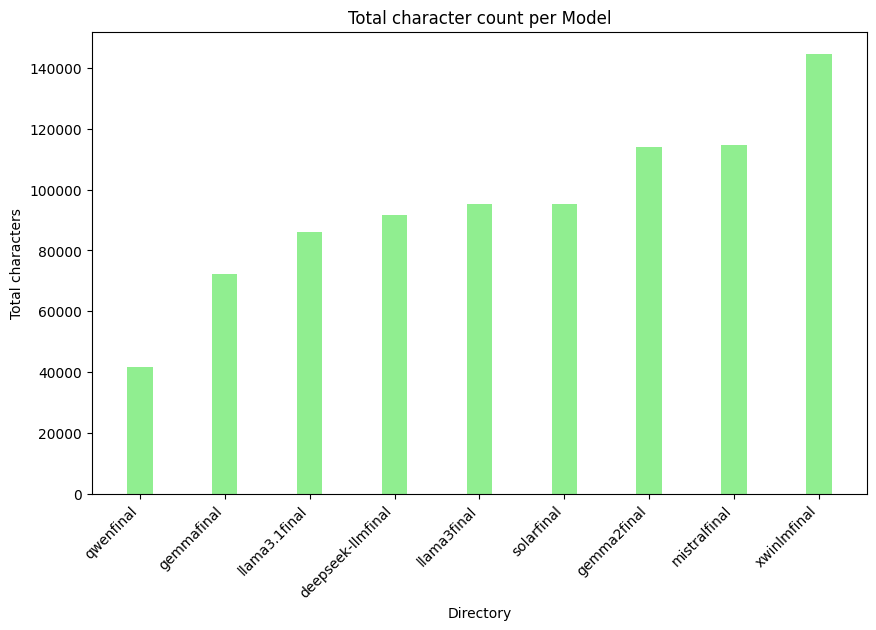

In [1]:
import os
import matplotlib.pyplot as plt

def countchars(dirpath):
    # all the files from directory
    txtfiles = [f for f in os.listdir(dirpath)]

    # altogether total characters in the text file
    countchar = 0
    for filename in txtfiles:
        filepath = os.path.join(dirpath, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            countchar += len(file.read())
    
    return countchar

def display(directories):
    
    dirnames = []
    charcount = []

    for directory in directories:
        # obtaining the names of the directory
        dirname = os.path.basename(directory)
        
        # finding the total character
        countchar = countchars(directory)
        
        # storing the obtained results
        dirnames.append(dirname)
        charcount.append(countchar)

    # sorting based on the character counts
    sort = sorted(zip(charcount, dirnames))
    charcount, dirnames = zip(*sort)

    # visualising the data
    plt.figure(figsize=(10, 6))
    plt.bar(dirnames, charcount, color='lightgreen', width=0.3)
    plt.xlabel('Directory')
    plt.ylabel('Total characters')
    plt.title('Total character count per Model')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

# list of directories
directories = [
    '../3.LLM Model/LLM Summaries/Selected_LLM_Models_PYPDF2/gemma/gemmafinal',
    '../3.LLM Model/LLM Summaries/Selected_LLM_Models_PYPDF2/deepseek-llm/deepseek-llmfinal',
    '../3.LLM Model/LLM Summaries/Selected_LLM_Models_PYPDF2/gemma2/gemma2final',
    '../3.LLM Model/LLM Summaries/Selected_LLM_Models_PYPDF2/llama3/llama3final',
    '../3.LLM Model/LLM Summaries/Selected_LLM_Models_PYPDF2/llama3.1/llama3.1final',
    '../3.LLM Model/LLM Summaries/Selected_LLM_Models_PYPDF2/mistral/mistralfinal',
    '../3.LLM Model/LLM Summaries/Selected_LLM_Models_PYPDF2/qwen/qwenfinal',
    '../3.LLM Model/LLM Summaries/Selected_LLM_Models_PYPDF2/solar/solarfinal',
    '../3.LLM Model/LLM Summaries/Selected_LLM_Models_PYPDF2/xwinlm/xwinlmfinal',
]

display(directories)
